In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
file_path = 'data.csv'  # Replace with the actual path to your dataset
features = ['Ks', 'Kf', 'AvgK', 'CYL', 'AA', 'Ecc.9.0mm.', 'ACCP']
target = 'ESI.Posterior.'

In [ ]:
def preprocess_data(dataset, features, target):
    # Handle missing values by dropping rows with NaN values
    dataset = dataset.dropna()

    # Encode categorical variables
    dataset['idEye'] = dataset['idEye'].astype('category').cat.codes

    # Split the data into features (X) and target (y)
    X = dataset[features]
    y = dataset[target]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    


In [12]:
dataset = pd.read_csv(file_path)

In [13]:
dataset['idEye'] = dataset['idEye'].astype('category').cat.codes

In [14]:
X = dataset[features]
y = dataset[target]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [25]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

C:\Users\KIIT\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\KIIT\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\KIIT\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565:

In [28]:
print("Model Performance:")
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)

Model Performance:
Accuracy: 0.64
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.96      0.81       412
           5       0.33      0.07      0.12        14
           6       0.22      0.06      0.09        34
           7       0.08      0.06      0.07        16
           8       0.00      0.00      0.00        11
           9       0.00      0.00      0.00         5
          10       0.00      0.00      0.00        10
          11       0.00      0.00      0.00        10
          12       0.00      0.00      0.00         8
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         3
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         5
          18       0.00      0.00      0.00         2
          19       0.00      0.00      0.00         1
          20       0.00 

In [29]:
num_features = len(features)
num_rows = (num_features + 2) // 3  

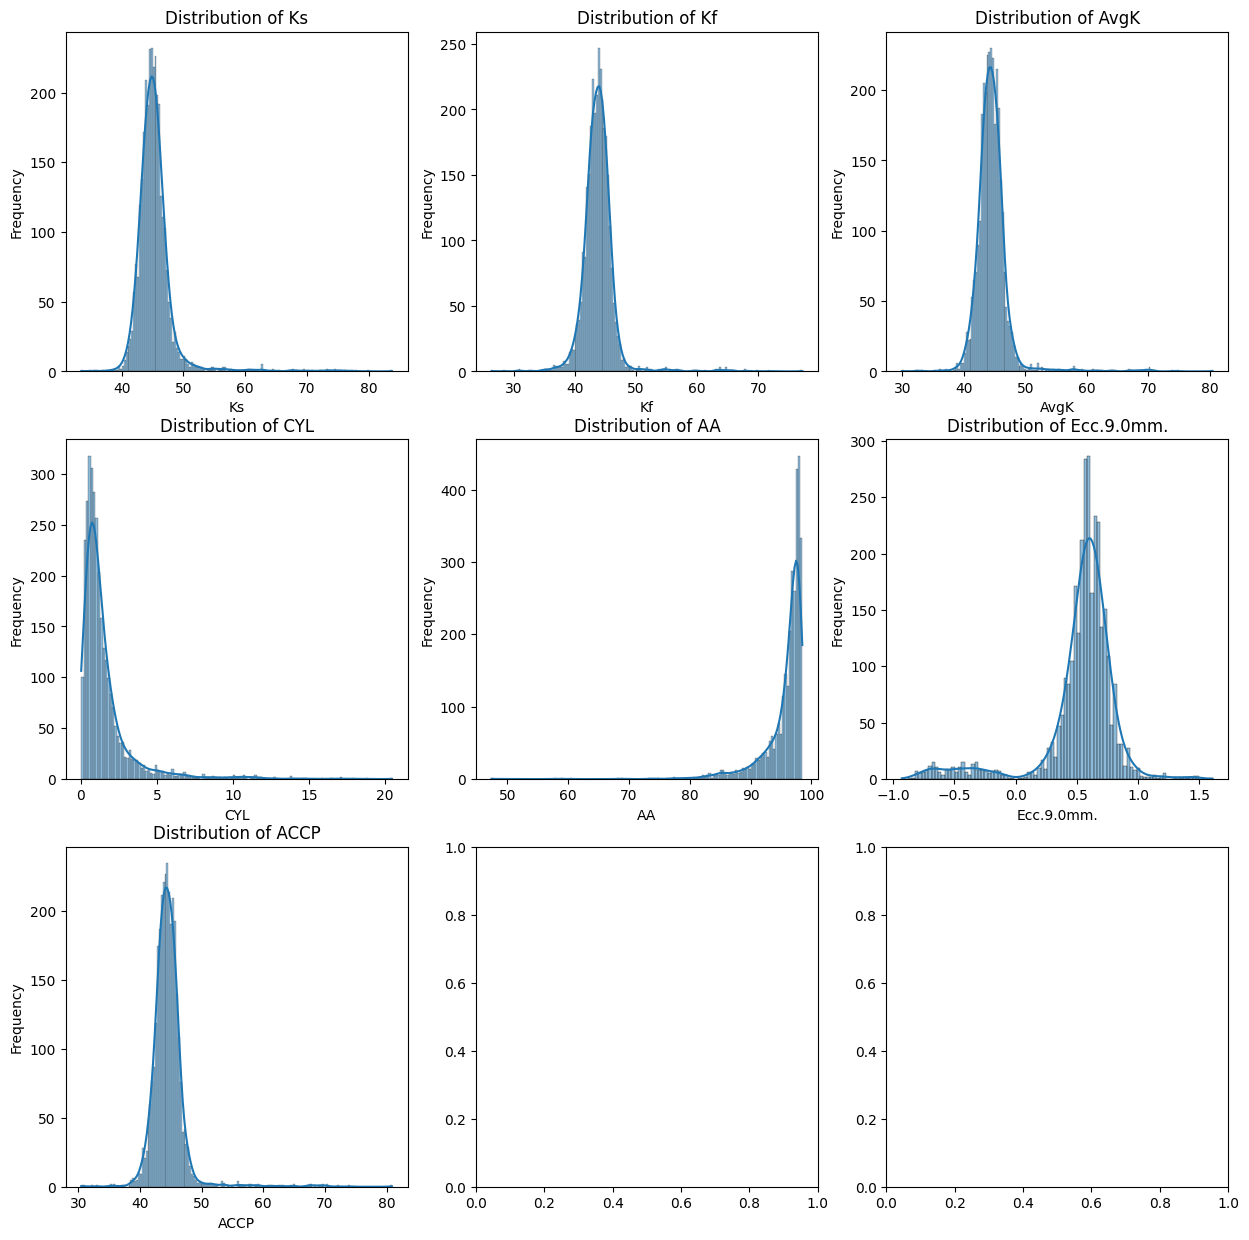

In [30]:
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Flatten the 2D array of axes for easy indexing

for i, feature in enumerate(features):
    ax = axes[i]
    sns.histplot(dataset[feature], ax=ax, kde=True)
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')

In [31]:
for i in range(num_features, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>